# Data Mining Final Project: Disneyland Reviews

# The Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
disney_df = pd.read_csv("DisneylandReviews.csv", encoding='latin-1')

In [3]:
disney_df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
disney_df.dtypes

Review_ID             int64
Rating                int64
Year_Month           object
Reviewer_Location    object
Review_Text          object
Branch               object
dtype: object

In [5]:
disney_df.shape

(42656, 6)

# Pre-Processing The Data

In [6]:
disney_df = disney_df.dropna(axis=0) #remove all null values

In [7]:
disney_df.drop_duplicates() #remove all duplicates

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [8]:
disney_df = disney_df[disney_df.Review_ID != "missing"]

In [9]:
disney_df = disney_df[disney_df.Rating != "missing"]

In [10]:
disney_df = disney_df[disney_df.Year_Month != "missing"]

In [11]:
disney_df = disney_df[disney_df.Reviewer_Location != "missing"]

In [12]:
disney_df = disney_df[disney_df.Review_Text != "missing"]

In [13]:
disney_df = disney_df[disney_df.Branch != "missing"]

In [14]:
disney_df.shape

(40043, 6)

In [15]:
disney_df['Year'] = disney_df.Year_Month.str[:4]

In [16]:
disney_df['Month'] = disney_df.Year_Month.str[5:]

In [17]:
disney_df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


# Modeling

In [38]:
import seaborn as sns

<AxesSubplot:xlabel='Rating', ylabel='count'>

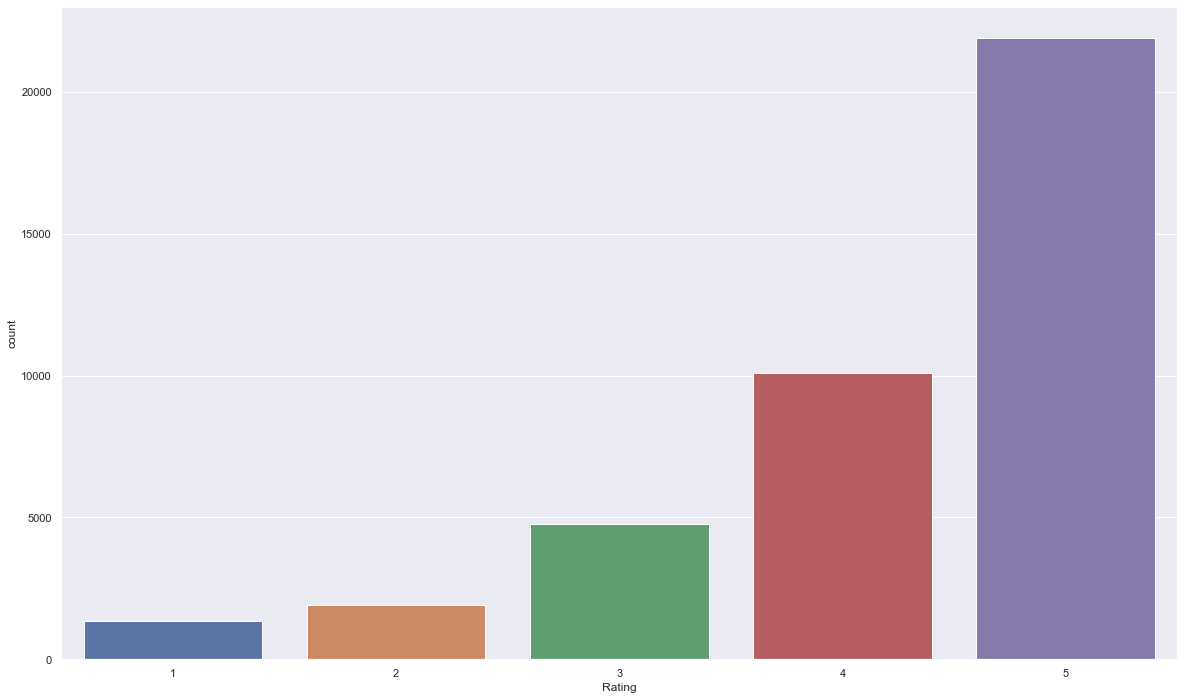

In [39]:
sns.set(rc={"figure.figsize":(20,12)})
sns.countplot(data=disney_df, x='Rating')

<AxesSubplot:xlabel='Year', ylabel='Rating'>

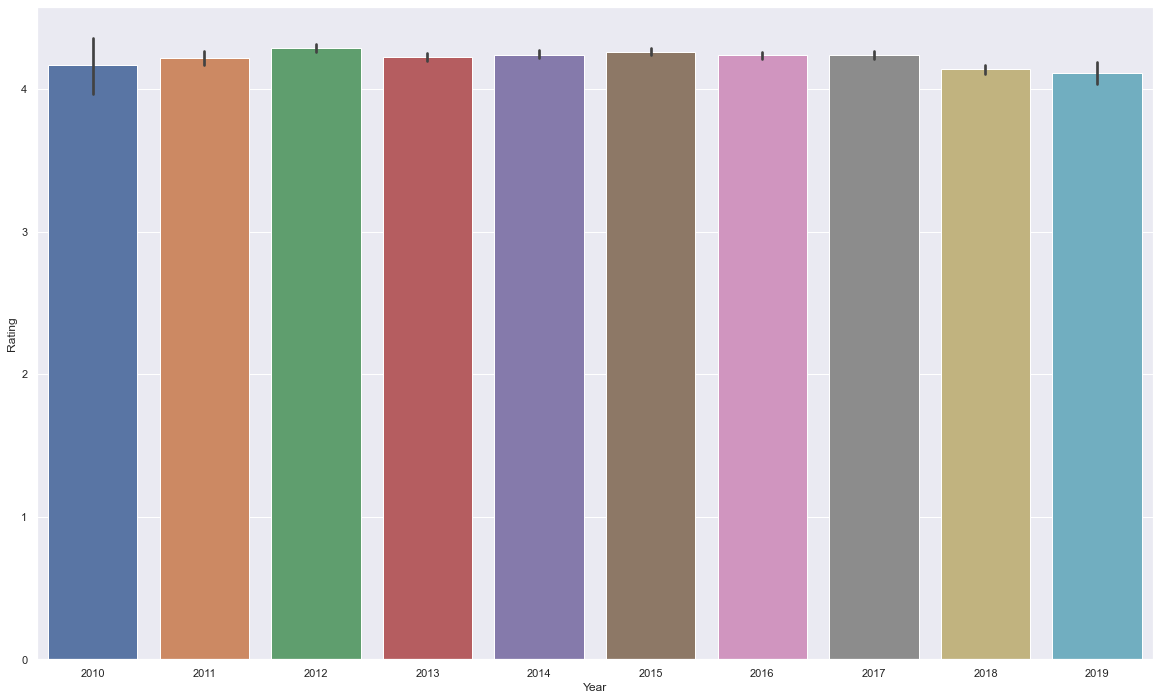

In [49]:
order = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
sns.set(rc={"figure.figsize":(20,12)})
sns.barplot(data=disney_df, x='Year', y='Rating', order=order)

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

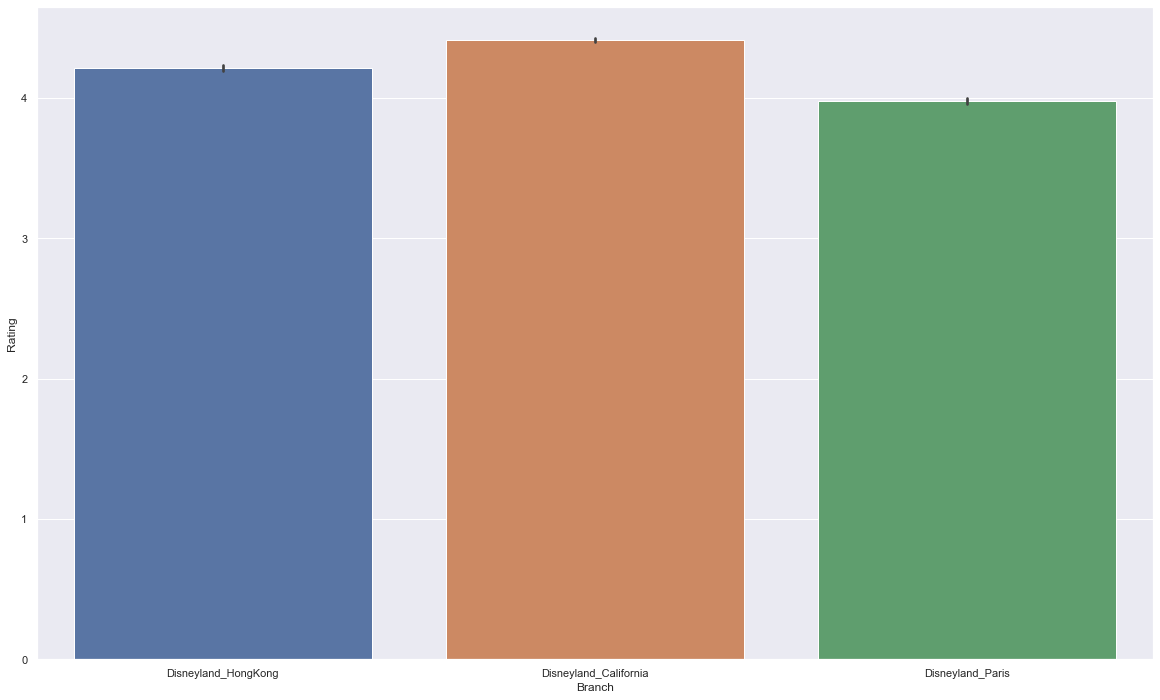

In [43]:
sns.set(rc={"figure.figsize":(20,12)})
sns.barplot(data=disney_df, x='Branch', y='Rating')

<AxesSubplot:xlabel='Rating', ylabel='count'>

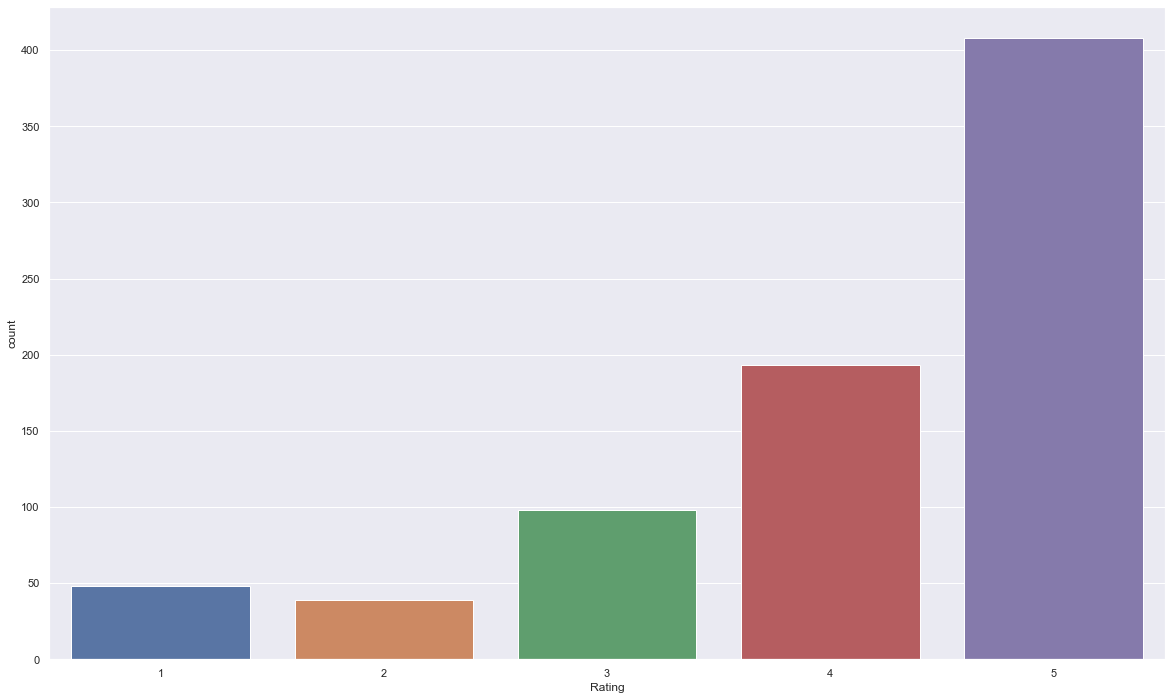

In [51]:
sns.countplot(data=disney_df[disney_df['Year'] == "2019"], x='Rating')

<AxesSubplot:xlabel='Rating', ylabel='count'>

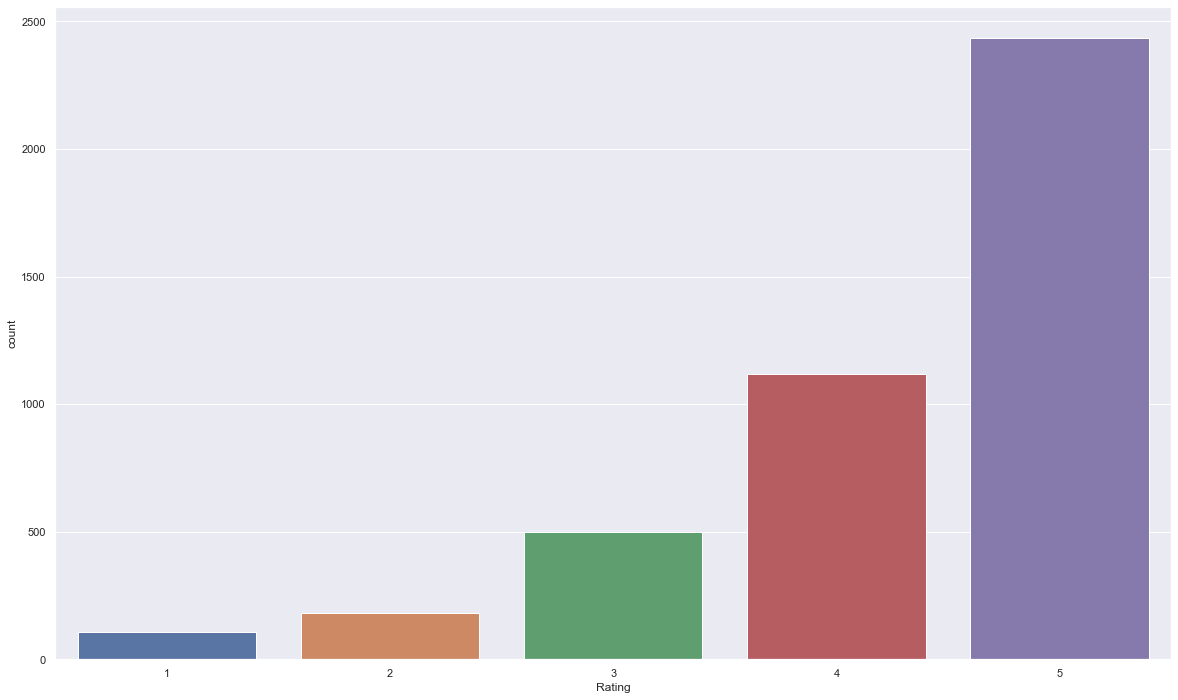

In [52]:
sns.countplot(data=disney_df[disney_df['Year'] == "2012"], x='Rating')

# K-Means Clustering